<a href="https://colab.research.google.com/github/ImRaushanS/Bitcoin-Price-Predictior/blob/main/Bitcoin_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/drive/MyDrive/CryptoPrediction/BTC/BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3.069000e+03
mean,12964.269570,13289.138736,12603.264842,12969.720076,12969.720076,1.643561e+10
std,16110.418963,16521.642527,15635.585230,16106.134985,16106.134985,1.987546e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,696.523010,706.283997,678.156006,700.971985,700.971985,1.067940e+08
50%,7220.593750,7387.240234,7050.332031,7218.816406,7218.816406,7.805480e+09
75%,17168.001953,17705.199219,16899.394531,17196.554688,17196.554688,2.791964e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3069 non-null   object 
 1   Open       3069 non-null   float64
 2   High       3069 non-null   float64
 3   Low        3069 non-null   float64
 4   Close      3069 non-null   float64
 5   Adj Close  3069 non-null   float64
 6   Volume     3069 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.0+ KB


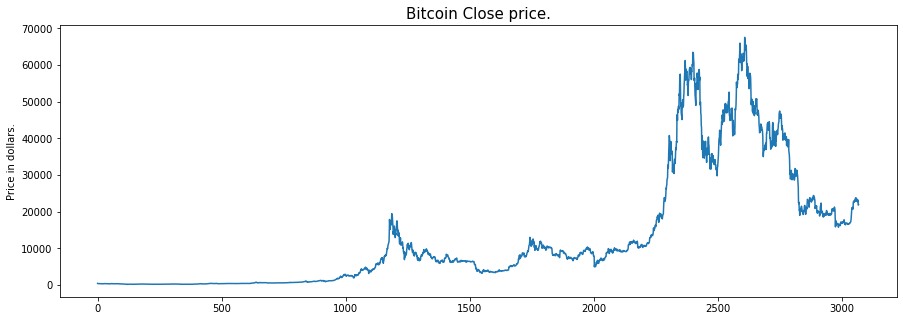

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

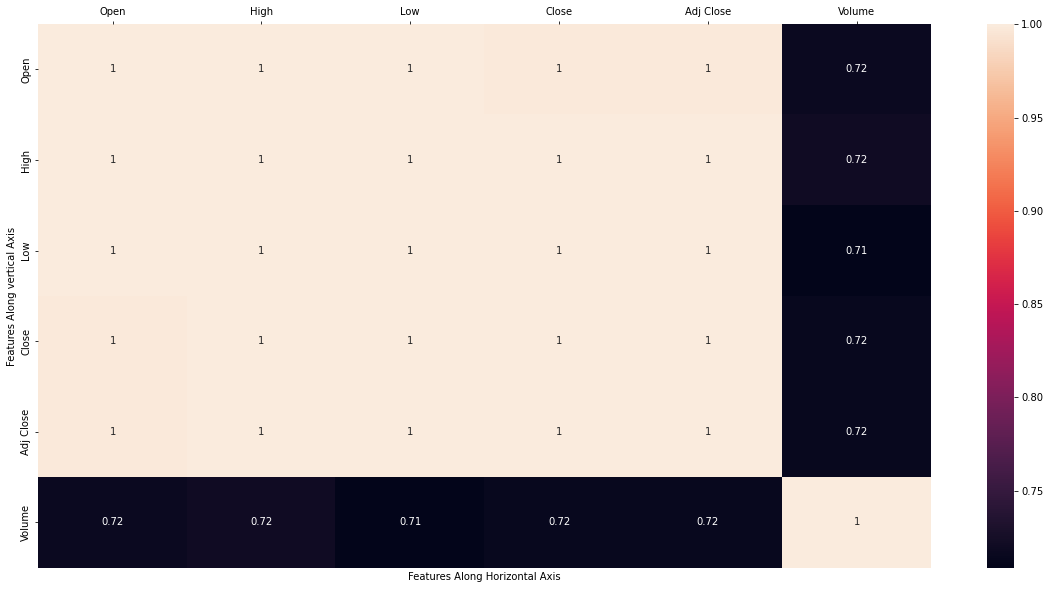

In [7]:
plt.figure(figsize=(20, 10))
ax=sns.heatmap(df.corr(), annot=True)
ax.set(xlabel="Features Along Horizontal Axis", ylabel="Features Along vertical Axis")
ax.xaxis.tick_top()
plt.show()

In [8]:
df[df['Close'] == df['Adj Close']]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3064,2023-02-06,22954.021484,23119.279297,22692.025391,22760.109375,22760.109375,23825006542
3065,2023-02-07,22757.267578,23310.974609,22756.257813,23264.291016,23264.291016,27187964471
3066,2023-02-08,23263.416016,23367.958984,22731.097656,22939.398438,22939.398438,25371367758
3067,2023-02-09,22946.566406,22996.437500,21773.974609,21819.039063,21819.039063,32572572185


In [9]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((3069, 7), (3069, 7))

In [10]:
df = df.drop(['Adj Close'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3069 non-null   object 
 1   Open    3069 non-null   float64
 2   High    3069 non-null   float64
 3   Low     3069 non-null   float64
 4   Close   3069 non-null   float64
 5   Volume  3069 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 144.0+ KB


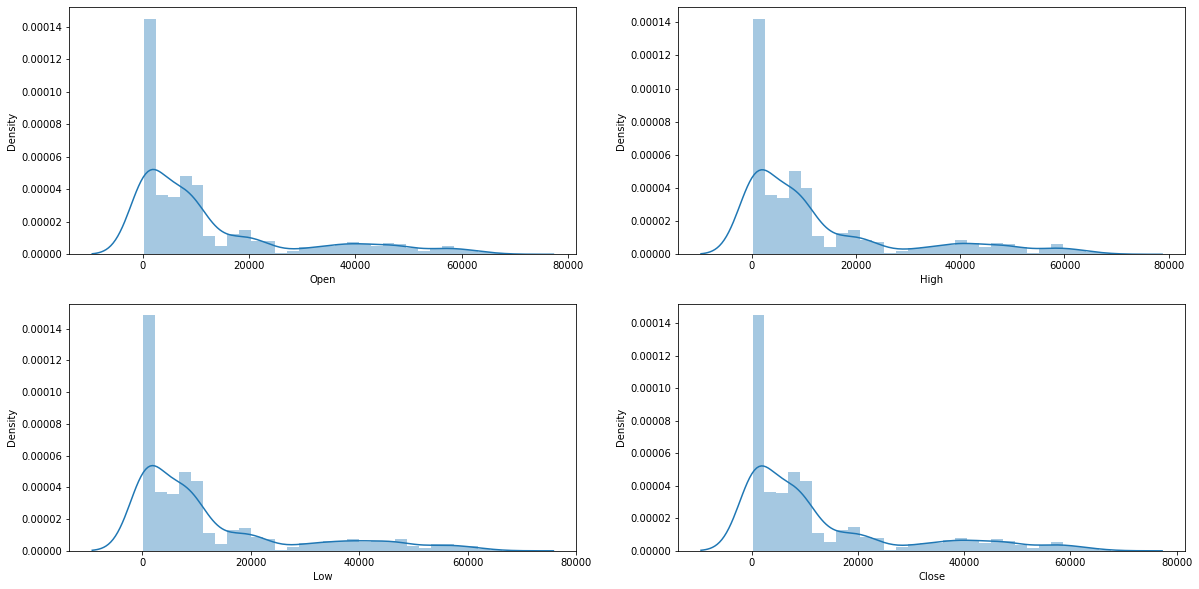

In [12]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()

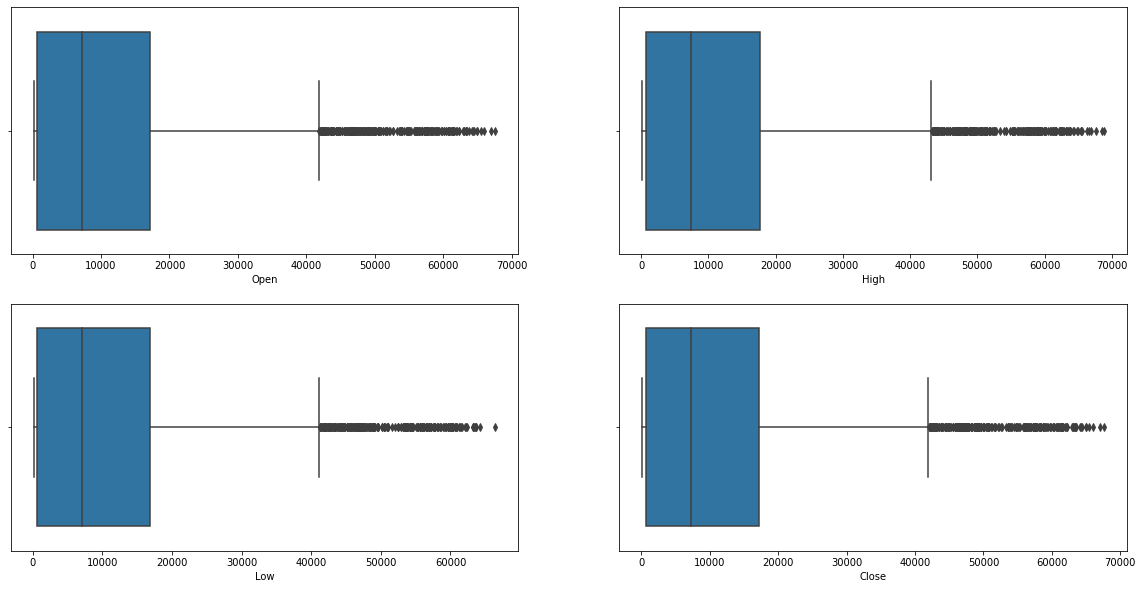

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
plt.show()